## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Collection**

Dataset berasal dari Kaggle dan bersifat publik. Agar lebih mudah untuk mengakses dataset, digunakan Kaggle API. Tujuannya agar kita tidak perlu mengunggah dataset ke collab.
Adapun langkah-langkah untuk mengakses dataset langsung dari kaggle adalah sebagai berikut :

1. Install Library Kaggle

In [2]:
!pip install kaggle

2. Buat direktori baru untuk menampung dataset yang diambil dari Kaggle. Pada proyek ini kita membuat direktori bernama dataset

In [3]:
!mkdir ~/.kaggle
!mkdir dataset

3. Untuk mengakses Kaggle kita membutuhkan kaggle API. Cara mendapatkan kagle API adalah masuk ke halaman pengaturan (*setting*) di kaggle, kemudian pilih API dan klik tombol **Create New Token**. Selanjutnya anda akan mendapatkan file kaggle.json yang digunakan untuk mengakses API. Umggah file kaggle.json kedalam proyek collab kita.

In [4]:
!cp kaggle.json ~/.kaggle/

4. Tambahkan perizinan agar file kaggle.json dapat digunakan

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

5. Download dataset menggunakan tautan yang terdapat di kaggle

In [6]:
!kaggle datasets download conorvaneden/best-songs-on-spotify-for-every-year-2000-2023

Dataset URL: https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023
License(s): unknown
  0% 0.00/71.4k [00:00<?, ?B/s]
100% 71.4k/71.4k [00:00<00:00, 220MB/s]


6. Lakukan unzip karena file dataset dalam bentuk .*zip. Kemudian masukan file ke dalam direktori dataset.

In [7]:
!unzip /content/best-songs-on-spotify-for-every-year-2000-2023.zip -d dataset/

Archive:  /content/best-songs-on-spotify-for-every-year-2000-2023.zip
  inflating: dataset/Best Songs on Spotify from 2000-2023.csv  


## **Data Understanding**

* Dataset berisi daftar lagu hits dari Spotify pada rentang tahun 2000 sampai 2023. Dataset dapat di download pada tautan berikut : https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023
* Memberikan informasi seperti deskripsi kolom, jumlah data, missing value, dan duplikasi data.
* Melakukan menipulasi untuk memudahkan pemrosesan data
* Melakukan beberapa tahapan yang diperlukan untuk memahami data contohnya teknik visualisasi data atau exploratory data analysis.

In [9]:
song = pd.read_csv("/content/dataset/Best Songs on Spotify from 2000-2023.csv", delimiter=";")
song

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,Southbound,Beach Blvd,rock,2023,140,88,60,-6,10,49,228,19,4,21
2381,Dance with Somebody - Radio Version,Mando Diao,dalarna indie,2009,150,90,55,-4,36,51,241,0,9,16
2382,Flow,Desire Machines,indie,2022,100,87,60,-7,9,74,255,0,5,15
2383,Scared of the Dark,Everything Brighter,pop,2023,120,80,65,-6,7,61,179,0,6,11


**Informasi Tentang Kolom**
<ol>
    <li><b>title</b>: Judul Lagu</li>
    <li><b>artist</b>: Penyanyi Lagu</li>
    <li><b>top genre</b>: Genre Lagu</li>
    <li><b>year</b>: Tahun Lagu Pertama Kali Dikeluarkan</li>
    <li><b>bpm</b>: Tempo Lagu (Beats Per Minutes)</li>
    <li><b>energy</b>: Energi Lagu (Semakin besar nilai, maka energi juga semakin besar)</li>
    <li><b>danceability</b>: Semakin besar nilai, maka semakin mudah menari mengikuti lagu</li>
    <li><b>db</b>: Semakin besar nilai, maka suara lagu semakin kencang</li>
    <li><b>liveness</b>: Semakin besar nilai, maka semakin sesar kemungkinan lagu berasal dari live recording</li>
    <li><b>valence</b>: Semakin besar nilai, maka semakin positif mood untuk lagu tersebut</li>
    <li><b>duration</b>: Durasi Lagu (detik)</li>
    <li><b>acousticness</b>: Semakin besar nilai, maka semakin akustik lagu tersebut</li>
    <li><b>speechiness</b>: Semakin besar nilai, maka semakin banyak kata yang diucapkan dalam lagu tersebut</li>
    <li><b>popularity</b>: Semakin besar nilai, maka popularitas lagu semakin tinggi</li>
</ol>

### **Exploratory Data Analysis**

**Data Overview**

In [10]:
song.shape

(2385, 14)

In [11]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2385 non-null   object
 1   artist         2385 non-null   object
 2   top genre      2385 non-null   object
 3   year           2385 non-null   int64 
 4   bpm            2385 non-null   int64 
 5   energy         2385 non-null   int64 
 6   danceability   2385 non-null   int64 
 7   dB             2385 non-null   int64 
 8   liveness       2385 non-null   int64 
 9   valence        2385 non-null   int64 
 10  duration       2385 non-null   int64 
 11  acousticness   2385 non-null   int64 
 12  speechiness    2385 non-null   int64 
 13  popularity     2385 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 261.0+ KB


In [12]:
def create_missing_df(dataframe):
    missing_index=dataframe.columns.tolist()
    missing=dataframe.isnull().sum().tolist()
    missing_df=pd.DataFrame({'Missing':missing}, index=missing_index)
    return missing_df

In [13]:
create_missing_df(song)

,Missing
title,0
artist,0
top genre,0
year,0
bpm,0
energy,0
danceability,0
dB,0
liveness,0
valence,0


In [14]:
print('Banyak judul musik: ', len(song.title.unique()))

Banyak judul musik:  2261


In [15]:
print('Banyak artis / penyanyi: ', len(song.artist.unique()))

Banyak artis / penyanyi:  1014


**Lagu dengan Popularitas Tertinggi**

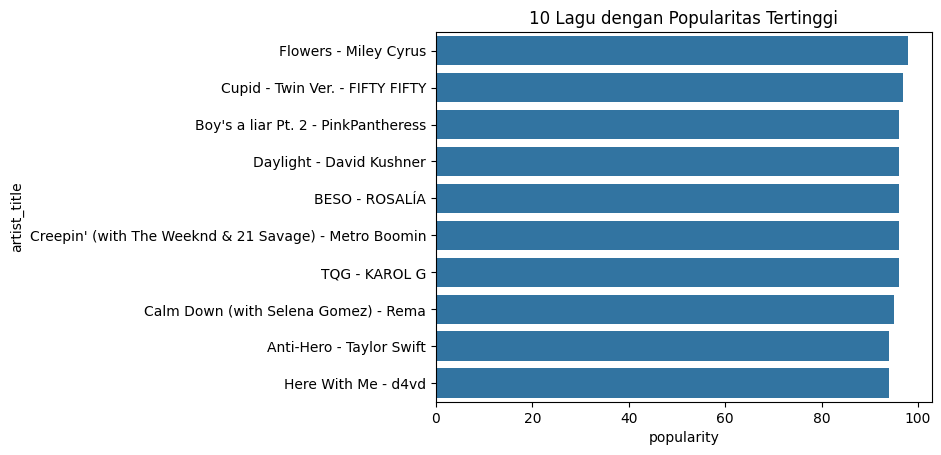

In [16]:
song_popularity = song[['title','artist', 'popularity']].sort_values(by='popularity', ascending=False)
song_popularity['artist_title'] = song_popularity['title'] + ' - ' + song_popularity['artist']
sns.barplot(data=song_popularity.iloc[:10], y='artist_title', x='popularity')
plt.title('10 Lagu dengan Popularitas Tertinggi')
plt.show()

**Penyanyi dengan Lagu Terbanyak di Spotify**

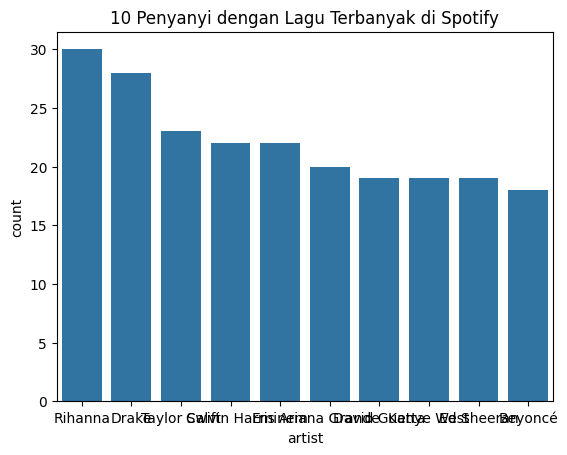

In [17]:
song_artist = song['artist'].value_counts().reset_index()[:10]
sns.barplot(data=song_artist, y='count', x='artist')
plt.title('10 Penyanyi dengan Lagu Terbanyak di Spotify')
plt.show()

**Distribusi dari Data Numerik**

In [18]:
song_cols =  ['bpm', 'energy', 'danceability ', 'dB', 'liveness', 'valence',
              'duration', 'acousticness', 'speechiness ', 'popularity']

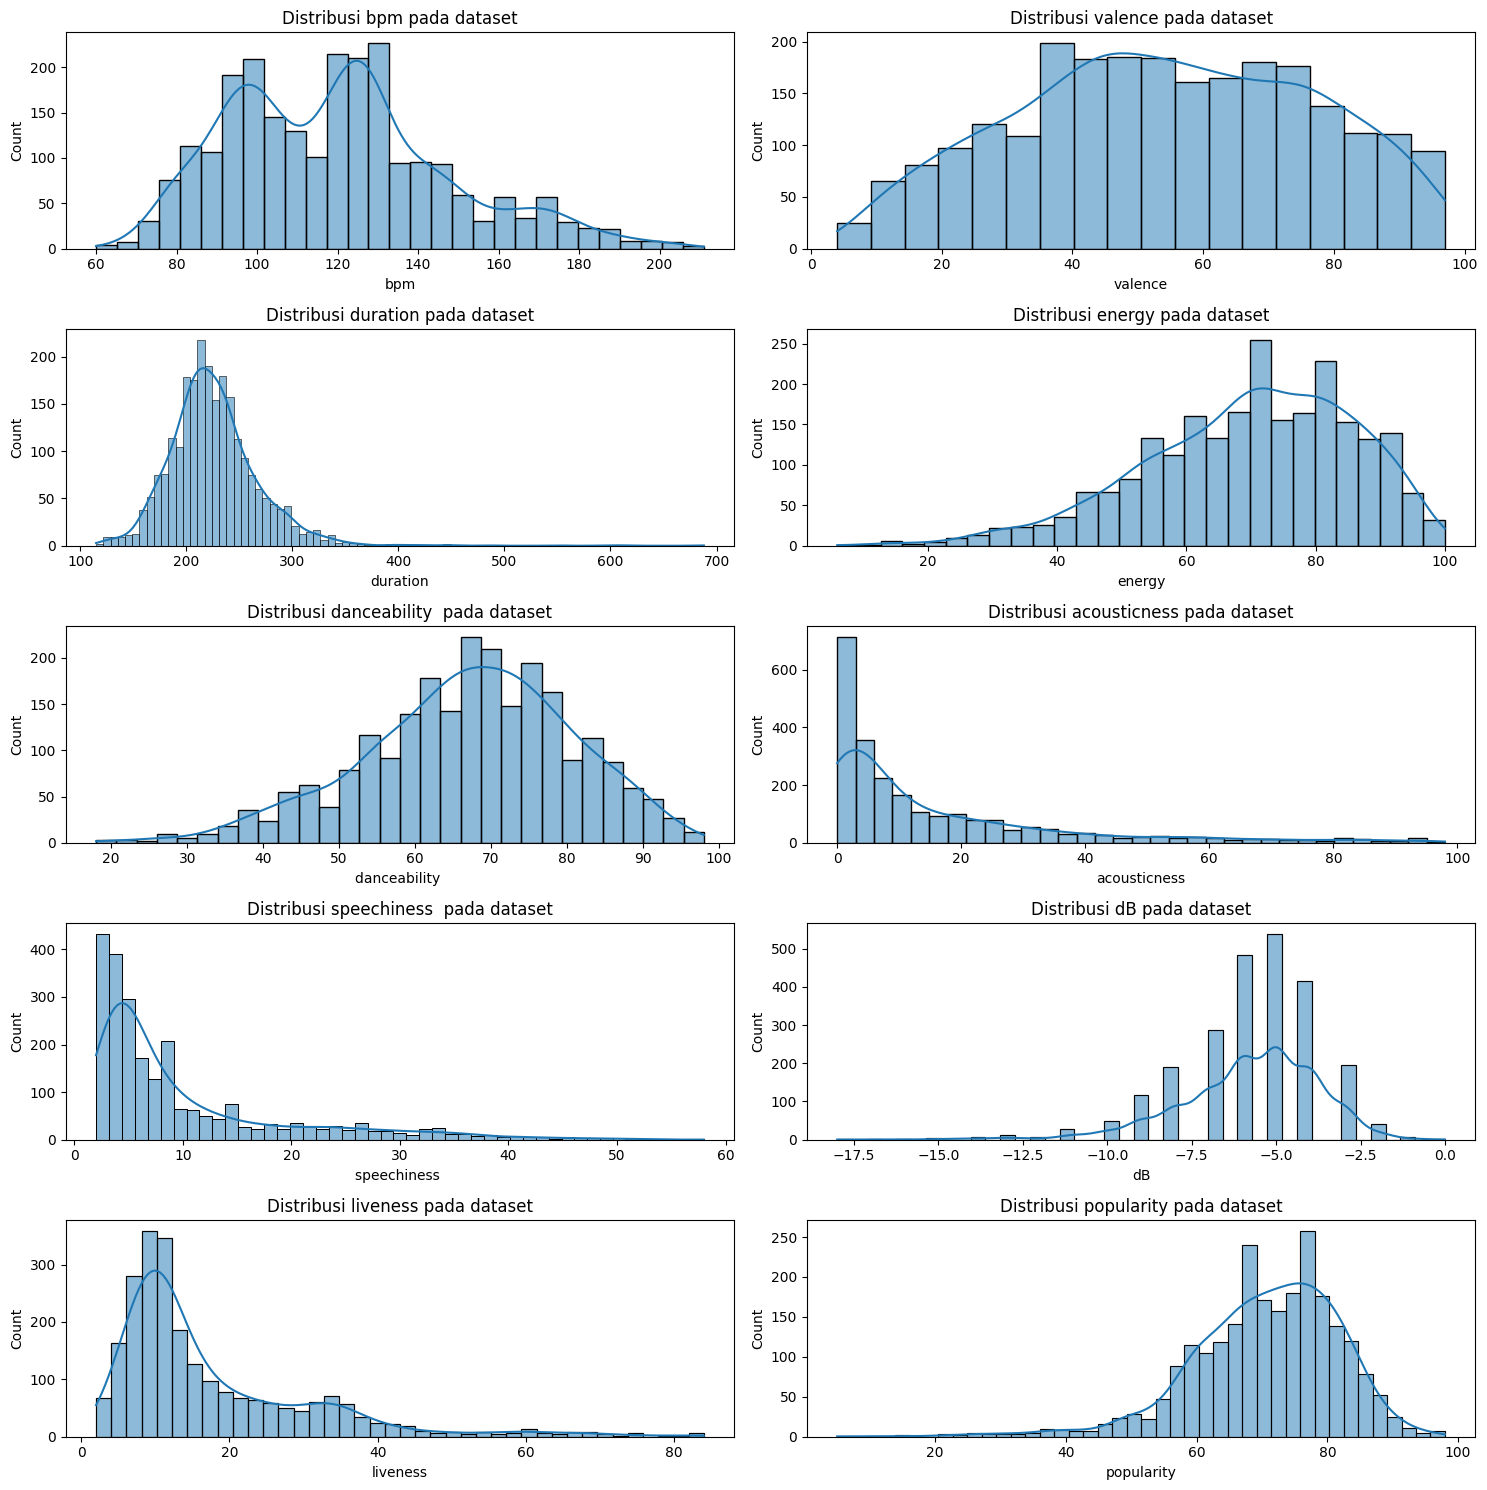

In [19]:
fig, axes = plt.subplots(5, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
for count, col in enumerate(song_cols):
    sns.histplot(song[col], kde=True, ax=axes[count%5][count % 2])
    axes[count%5][count % 2].title.set_text(f'Distribusi {col} pada dataset')

plt.tight_layout()
plt.show()

**Korelasi Tiap Data Numerik**

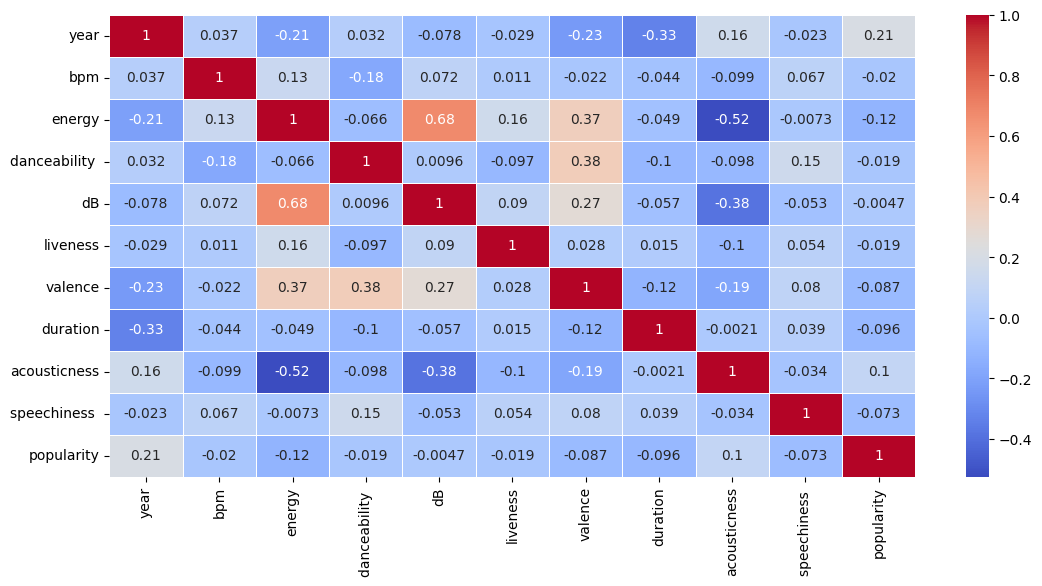

In [20]:
plt.figure(figsize=(13,6))
# Select only numerical columns for correlation calculation
numerical_song = song.select_dtypes(include=np.number)
sns.heatmap(numerical_song.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

## **Data Preparation**

In [21]:
song.drop(columns=['bpm', 'energy', 'dB', 'liveness', 'valence', 'duration', 'acousticness',
                   'danceability ', 'speechiness '], inplace=True)
song.head()

,title,artist,top genre,year,popularity
0,Flowers,Miley Cyrus,pop,2023,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,97
2,BESO,ROSALÍA,pop,2023,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,96


In [22]:
song.rename(columns = {'top genre':'genre'}, inplace = True)
song.head()

,title,artist,genre,year,popularity
0,Flowers,Miley Cyrus,pop,2023,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,97
2,BESO,ROSALÍA,pop,2023,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,96


**Explore Genre**

In [23]:
print('Banyak genre musik: ', len(song.genre.unique()))
print('Genre Musik: ', song.genre.unique())

Banyak genre musik:  266
Genre Musik:  ['pop' 'k-pop girl group' 'bronx drill' 'rap' 'gen z singer-songwriter'
 'reggaeton' 'afrobeats' 'bedroom pop' 'big room'
 'canadian contemporary r&b' 'piano rock' 'argentine hip hop' 'chill pop'
 'detroit hip hop' 'new jersey underground rap' 'uk contemporary r&b'
 'canadian hip hop' 'r&b' 'modern alternative rock' 'alt z' 'k-pop'
 'modern indie pop' 'gauze pop' 'colombian pop' 'contemporary country'
 'art pop' 'hip pop' 'latin hip hop' 'permanent wave' 'garage rock'
 'indie poptimism' 'boy band' 'dance pop' 'dfw rap' 'canadian pop'
 'chicago indie' 'lgbtq+ hip hop' 'chicago rap' 'alternative metal'
 'melodic drill' 'alternative rock' 'electropop' 'neo mellow'
 'australian hip hop' 'modern rock' 'edm' 'belgian edm' 'neo soul'
 'indie rock italiano' 'glam rock' 'viral pop' 'hip hop'
 'conscious hip hop' 'barbadian pop' 'east coast hip hop' 'british soul'
 'australian psych' 'mambo chileno' 'electro house' 'alternative hip hop'
 'dark clubbing' 'ca

In [24]:
r,c = song[song['genre']=='(tidak ada genre pada daftar)'].shape
print('Jumlah lagu yang tidak memiliki info genre:',r)

Jumlah lagu yang tidak memiliki info genre: 0


In [25]:
song=song[~(song['genre']=='(tidak ada genre pada daftar)')].reset_index(drop=True)

In [26]:
genre_count = song['genre'].value_counts().to_frame()

song_value_counts = pd.DataFrame(genre_count)
song_value_counts = song_value_counts.reset_index()
song_value_counts.columns = ['Genre', 'Jumlah']
song_value_counts

,Genre,Jumlah
0,dance pop,460
1,pop,250
2,atl hip hop,95
3,alternative metal,55
4,edm,54
...,...,...
261,dubstep,1
262,rap francais nouvelle vague,1
263,k-pop girl group,1
264,rock,1


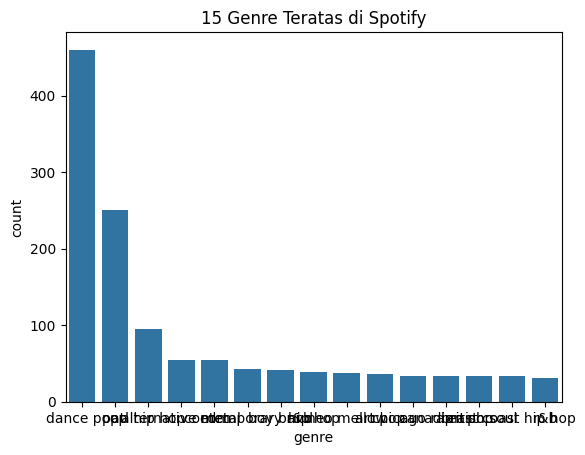

In [27]:
song_genre = song['genre'].value_counts().reset_index()[:15]
sns.barplot(data=song_genre, y='count', x='genre')
sns.set(rc={'figure.figsize':(9, 6)})
plt.title('15 Genre Teratas di Spotify')
plt.show()

**Menyederhanakan Genre**

In [28]:
def setgenrecategory(text):
  if text == 'dance pop':
    return 'dance pop'
  elif (text == 'pop' or text == 'modern indie pop' or text == 'gauze pop' or text =='colombian pop' or
        text == 'art pop' or text == 'canadian pop' or text == 'viral pop' or text =='barbadian pop' or
        text == 'modern alternative pop' or text == 'danish pop' or text == 'puerto rican pop' or
        text == 'irish pop' or text == 'latin pop' or text == 'baroque pop' or text == 'acoustic pop' or
        text == 'german pop' or text == 'belgian pop' or text == 'australian pop' or text == 'candy pop' or
        text == 'indonesian pop' or text == 'funk pop' or text == 'israeli pop' or text == 'nz pop' or
        text == 'indonesian lo-fi pop' or text == 'french indie pop' or text == 'nyc pop' or
        text == 'romanian pop' or text == 'panamanian pop' or text == 'chamber pop' or text == 'austrian pop' or
        text == 'indie pop' or text == 'uk pop' or text == 'dutch pop' or text == 'singaporean pop' or
        text == 'indonesian city pop' or text == 'bahamian pop' or text == 'new wave pop' or
        text == 'uk alternative pop' or text == 'bedroom pop' or text == 'bedroom pop'):
    return 'pop'
  elif (text == 'k-pop girl group' or text == 'k-pop'):
    return 'kpop'
  elif (text == 'argentine hip hop' or text == 'detroit hip hop' or text == 'canadian hip hop' or
        text == 'latin hip hop' or text == 'lgbtq+ hip hop' or text == 'australian hip hop' or
        text == 'hip hop' or text == 'conscious hip hop' or text == 'east coast hip hop' or
        text == 'alternative hip hop' or text == 'atl hip hop' or text == 'kentucky hip hop' or
        text == 'deep underground hip hop' or text == 'uk hip hop' or text =='hawaiian hip hop' or
        text == 'asian american hip hop' or text == 'memphis hip hop' or text == 'bronx hip hop' or
        text == 'canadian old school hip hop' or text == 'ohio hip hop' or text == 'norwegian hip hop' or
        text == 'miami hip hop' or text == 'southern hip hop' or text == 'birmingham hip hop' or
        text == 'ghanaian hip hop' or text == 'hardcore hip hop'):
    return 'hiphop'
  elif (text == 'piano rock' or text == 'modern alternative rock' or text == 'garage rock' or
        text == 'alternative rock' or text == 'modern rock' or text == 'indie rock italiano' or
        text == 'glam rock' or text == 'dance rock' or text == 'blues rock' or text == 'irish rock' or
        text == 'celtic rock' or text == 'indie rock' or text == 'british alternative rock' or
        text == 'alternative pop rock' or text == 'pop rock' or text == 'rap rock' or
        text == 'finnish alternative rock' or text == 'modern folk rock' or
        text == 'australian alternative rock' or text == 'rock-and-roll' or
        text == 'art rock' or text == 'rock'):
    return 'rock'
  elif (text == 'alternative metal' or text == 'glam metal' or text == 'nu metal' or
        text == 'metal'):
    return 'metal'
  elif (text == 'neo soul' or text == 'british soul' or text == 'pop soul' or
        text == 'bedroom soul' or text == 'classical soul' or text == 'r&b/soul'):
    return 'soul'
  elif (text == 'contemporary country' or text == 'classic oklahoma country' or text == 'country' or
        text == 'canadian country'):
    return 'country'
  elif (text == 'chicago indie' or text == 'brighton indie' or text =='la indie' or
        text == 'icelandic indie' or text == 'indie' or text == 'dalarna indie'):
    return 'indie'
  elif (text == 'rap' or text == 'new jersey underground rap' or text == 'dfw rap' or text == 'chicago rap' or
        text == 'emo rap' or text == 'pop rap' or text == 'gangster rap' or text == 'cali rap' or text == 'melodic rap' or
        text == 'indie pop rap' or text == 'cloud rap' or text == 'san diego rap' or text == 'viral rap' or
        text == 'new jersey rap' or text == 'chicano rap' or text == 'nyc rap' or text == 'dirty south rap' or
        text == 'houston rap' or text == 'comedy rap' or text == 'baton rouge rap' or text == 'london rap' or
        text == 'battle rap' or text == 'alabama rap'):
    return 'rap'
  elif (text == 'edm' or text == 'belgian edm' or text == 'dutch edm' or text == 'pinoy edm'):
    return 'edm'
  elif (text == 'canadian contemporary r&b' or text == 'uk contemporary r&b' or text == 'r&b' or
        text == 'afro r&b' or text == 'contemporary r&b' or text == 'alternative r&b' or
        text == 'chill r&b'):
    return 'rnb'
  elif (text == 'bronx drill' or text == 'melodic drill' or text == 'brooklyn drill' or text == 'florida drill'):
      return 'drill'
  elif (text == 'gen z singer-songwriter' or text == 'irish singer-songwriter' or
        text == 'scottish singer-songwriter' or text == 'neo-singer-songwriter'):
        return 'songwriter'
  else:
    return 'Other'

song['genre'] = song['genre'].apply(lambda x:setgenrecategory(x))
song

,title,artist,genre,year,popularity
0,Flowers,Miley Cyrus,pop,2023,98
1,Cupid - Twin Ver.,FIFTY FIFTY,kpop,2023,97
2,BESO,ROSALÍA,pop,2023,96
3,Boy's a liar Pt. 2,PinkPantheress,drill,2023,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,96
...,...,...,...,...,...
2380,Southbound,Beach Blvd,rock,2023,21
2381,Dance with Somebody - Radio Version,Mando Diao,indie,2009,16
2382,Flow,Desire Machines,indie,2022,15
2383,Scared of the Dark,Everything Brighter,pop,2023,11


In [29]:
genre_count = song['genre'].value_counts().to_frame()

song_value_counts = pd.DataFrame(genre_count)
song_value_counts = song_value_counts.reset_index()
song_value_counts.columns = ['Genre', 'Jumlah']
song_value_counts

,Genre,Jumlah
0,Other,549
1,pop,460
2,dance pop,460
3,hiphop,300
4,rap,159
5,rock,113
6,rnb,96
7,edm,63
8,soul,63
9,metal,60


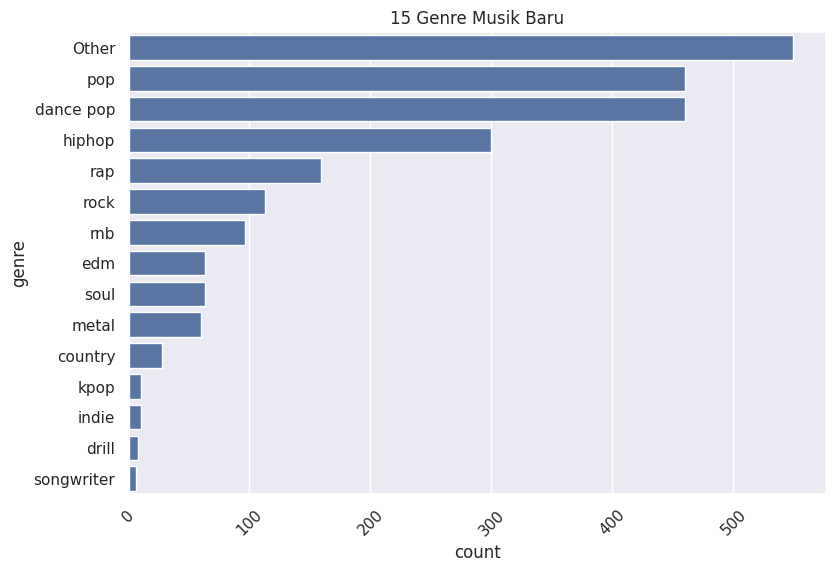

In [30]:
song_genre = song['genre'].value_counts().reset_index()
sns.barplot(data=song_genre, y='genre', x='count')
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(9, 6)})
plt.title('15 Genre Musik Baru')
plt.show()

## **Model Development dengan Content Based Filtering**

### **Implementasi TF-IDF**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vector=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf_vector.fit_transform(song['genre'])

In [33]:
print(list(enumerate(tfidf_vector.get_feature_names_out())))

[(0, 'country'), (1, 'dance'), (2, 'drill'), (3, 'edm'), (4, 'hiphop'), (5, 'indie'), (6, 'kpop'), (7, 'metal'), (8, 'pop'), (9, 'rap'), (10, 'rnb'), (11, 'rock'), (12, 'songwriter'), (13, 'soul')]


In [34]:
print(tfidf_matrix[:10])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (10, 14)>
  Coords	Values
  (0, 8)	1.0
  (1, 6)	1.0
  (2, 8)	1.0
  (3, 2)	1.0
  (4, 9)	1.0
  (5, 12)	1.0
  (8, 8)	1.0
  (9, 8)	1.0


In [35]:
tfidf_matrix.shape

(2385, 14)

In [36]:
tfidf_matrix.todense()[0]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### **Manhattan Distances**

In [37]:
from sklearn.metrics.pairwise import manhattan_distances

In [38]:
manhattan_matrix = manhattan_distances(tfidf_matrix)

In [39]:
manhattan_matrix

array([[0., 2., 0., ..., 2., 0., 1.],
       [2., 0., 2., ..., 2., 2., 1.],
       [0., 2., 0., ..., 2., 0., 1.],
       ...,
       [2., 2., 2., ..., 0., 2., 1.],
       [0., 2., 0., ..., 2., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

### **Euclidean Distances**

In [40]:
from sklearn.metrics.pairwise import euclidean_distances

In [41]:
euclidean_matrix = euclidean_distances(tfidf_matrix, tfidf_matrix)

In [42]:
euclidean_matrix

array([[0.        , 1.41421356, 0.        , ..., 1.41421356, 0.        ,
        1.        ],
       [1.41421356, 0.        , 1.41421356, ..., 1.41421356, 1.41421356,
        1.        ],
       [0.        , 1.41421356, 0.        , ..., 1.41421356, 0.        ,
        1.        ],
       ...,
       [1.41421356, 1.41421356, 1.41421356, ..., 0.        , 1.41421356,
        1.        ],
       [0.        , 1.41421356, 0.        , ..., 1.41421356, 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

###**Cosine Similarity**

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
cosine_matrix = cosine_similarity(tfidf_matrix)

In [45]:
cosine_matrix

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###**Membuat Rekomendasi**

**Implementasi FuzzyWuzzy**

FuzzyWuzzy digunakan untuk mencocokan nama lagu yang dimasukan user dengan nama lagu dari sumber data

In [46]:
!pip install fuzzywuzzy

In [47]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [48]:
def matching_score(a, b):
    return fuzz.ratio(a,b)

In [49]:
def get_title_from_index(index):

    return song[song.index == index]['title'].values[0]

In [50]:
def get_title_year_from_index(index):
    return song[song.index == index]['title'].values[0]

def get_genre_year_from_index(index):
    return song[song.index == index]['genre'].values[0]

def get_popularity_year_from_index(index):
    return song[song.index == index]['popularity'].values[0]

def get_index_from_title(title):
    return song[song.title == title].index.values[0]

In [51]:
def find_closest_title(title):
    leven_scores = list(enumerate(song['title'].apply(matching_score, b=title)))
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_title = get_title_from_index(sorted_leven_scores[0][0])
    distance_score = sorted_leven_scores[0][1]
    return closest_title, distance_score

###**Rekomendasi Lagu**

**Rekomendasi Lagu dengan Manhattan Distance**

In [52]:
def manhattan_distance_recommender(songs_likes, how_many):
    closest_title, distance_score = find_closest_title(songs_likes)
    if distance_score == 100:
        songs_index = get_index_from_title(closest_title)
        songs_list = list(enumerate(manhattan_matrix[int(songs_index)]))
        similar_songs = list(filter(lambda x:x[0] != int(songs_index), sorted(songs_list,key=lambda x:x[1], reverse=True))) # remove the typed movie itself

        print('Rekomendasi lagu yang mirip dengan '+'\033[1m'+str(closest_title)+'\033[0m'+' adalah \n')

    for i,s in similar_songs[:how_many]:
      song_title = get_title_year_from_index(i)
      song_genre = get_genre_year_from_index(i)
      song_popularity = get_popularity_year_from_index(i)
      print('\033[1m' + song_title +'\033[0m', '(' + song_genre, '- ' + str(song_popularity) +')')

In [53]:
manhattan_distance_recommender('Butter', 10)

Rekomendasi lagu yang mirip dengan Butter adalah 

When I Was Your Man (dance pop - 89)
Locked out of Heaven (dance pop - 88)
One Kiss (with Dua Lipa) (dance pop - 88)
Woman (dance pop - 87)
That's What I Like (dance pop - 86)
Levitating (feat. DaBaby) (dance pop - 85)
Give Me Everything (feat. Ne-Yo, Afrojack & Nayer) (dance pop - 84)
Hey, Soul Sister (dance pop - 84)
Levitating (dance pop - 84)
Summer (dance pop - 84)


**Rekomendasi Lagu dengan Euclidean Distances**

In [54]:
def euclidean_distance_recommender(songs_likes, how_many):
    closest_title, distance_score = find_closest_title(songs_likes)
    if distance_score == 100:
        songs_index = get_index_from_title(closest_title)
        songs_list = list(enumerate(euclidean_matrix[int(songs_index)]))
        similar_songs = list(filter(lambda x:x[0] != int(songs_index), sorted(songs_list,key=lambda x:x[1], reverse=True))) # remove the typed movie itself

        print('Rekomendasi lagu yang mirip dengan '+'\033[1m'+str(closest_title)+'\033[0m'+' adalah \n')

    for i, s in similar_songs[:how_many]:
      song_title = get_title_year_from_index(i)
      song_genre = get_genre_year_from_index(i)
      song_popularity = get_popularity_year_from_index(i)
      print('\033[1m' + song_title +'\033[0m', '(' +
            song_genre, '- ' + str(song_popularity) +')')

In [ ]:
euclidean_distance_recommender('Butter', 10)

Rekomendasi lagu yang mirip dengan Butter adalah 

Flowers (pop - 98)
BESO (pop - 96)
Boy's a liar Pt. 2 (drill - 96)
Creepin' (with The Weeknd & 21 Savage) (rap - 96)
Daylight (songwriter - 96)
Anti-Hero (pop - 94)
Here With Me (pop - 94)
Kill Bill (pop - 94)
Die For You - Remix (rnb - 93)
I Ain't Worried (rock - 93)


**Rekomendasi Lagu dengan Cosine Similarity**

In [55]:
def cosine_similarity_recommender(songs_likes, how_many):
    closest_title, distance_score = find_closest_title(songs_likes)
    if distance_score == 100:
        songs_index = get_index_from_title(closest_title)
        songs_list = list(enumerate(cosine_matrix[int(songs_index)]))
        similar_songs = list(filter(lambda x:x[0] != int(songs_index), sorted(songs_list,key=lambda x:x[1], reverse=True))) # remove the typed movie itself

        print('Rekomendasi lagu yang mirip dengan '+'\033[1m'+str(closest_title)+'\033[0m'+' adalah \n')

    for i, s in similar_songs[:how_many]:
      song_title = get_title_year_from_index(i)
      song_genre = get_genre_year_from_index(i)
      song_popularity = get_popularity_year_from_index(i)
      print('\033[1m' + song_title +'\033[0m', '(' +
            song_genre, '- ' + str(song_popularity) +')')

In [56]:
cosine_similarity_recommender('Butter', 10)

Rekomendasi lagu yang mirip dengan Butter adalah 

Cupid - Twin Ver. (kpop - 97)
Ditto (kpop - 90)
FLOWER (kpop - 86)
Dynamite (kpop - 83)
MONEY (kpop - 81)
Life Goes On (kpop - 78)
Permission to Dance (kpop - 78)
On The Ground (kpop - 73)
After School (kpop - 71)
Flowers (pop - 98)


Berdasarkan pengujian menggunakan 3 metrik pengukuran, diketahui bahwa Consine Similarity memiliki hasil rekomendasi yang paling baik karena sesuai dengan genre musik yang diputar user.